Plot a driver's lap times in a race, with color coding for the compounds (single, duo and trio comparation)

In [ ]:
!pip install fastf1

In [ ]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# The misc_mpl_mods option enables minor grid lines which clutter the plot
fastf1.plotting.setup_mpl(misc_mpl_mods=True)

In [ ]:
# Load the race session.
race = fastf1.get_session(2023, "Arabia", 'R')
race.load()

Single driver and differentiating compound by colors

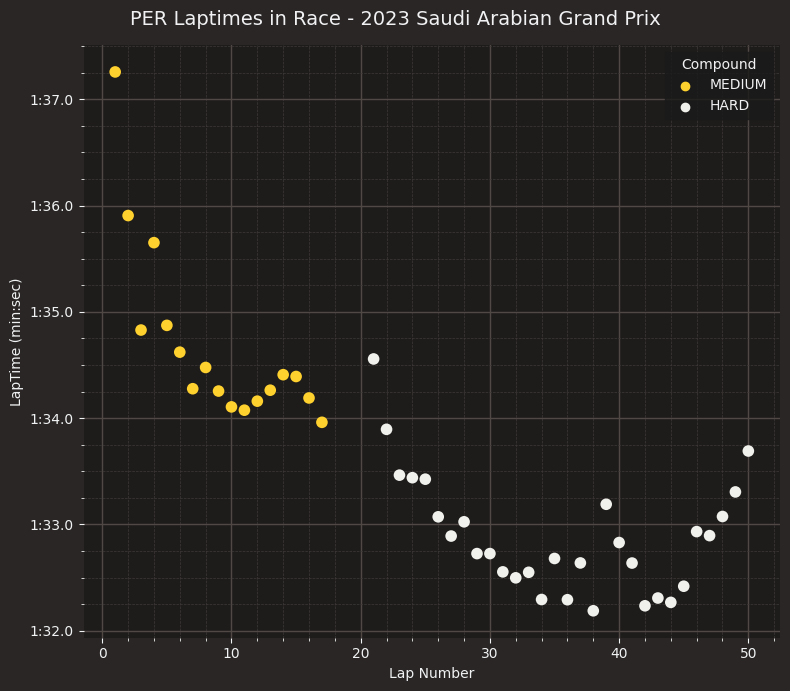

In [ ]:
# Get laps for a single driver and filter out slow laps as they distort the graph axis.
driver = 'PER'
driver_laps = race.laps.pick_driver(driver).pick_quicklaps().reset_index()


# Plot
fig, ax = plt.subplots(figsize=(8, 7))
plt.suptitle(f'{driver} Laptimes in {race.name} - {race.event.year} {race.event.EventName}', size=14)

sns.scatterplot(data=driver_laps, x="LapNumber", y="LapTime", ax=ax, hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS, s=70, linewidth=0, legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("LapTime (min:sec)")
ax.invert_yaxis()

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Two drivers and differentiating compounds by colors

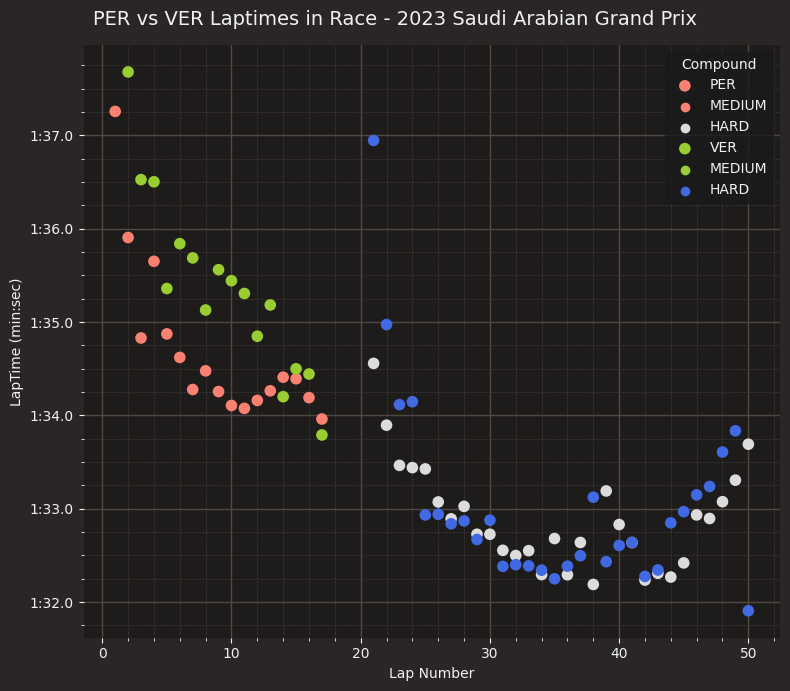

In [ ]:
# Driver info and colors
driver1 = 'PER'
driver1_laps = race.laps.pick_driver(driver1).pick_quicklaps().reset_index()
driver2 = 'VER'
driver2_laps = race.laps.pick_driver(driver2).pick_quicklaps().reset_index()
colors1 = ["salmon", "gainsboro"]  #M / H
colors2 = ["yellowgreen", "royalblue"]


# Plot
fig, ax = plt.subplots(figsize=(8, 7))
plt.suptitle(f'{driver1} vs {driver2} Laptimes in {race.name} - {race.event.year} {race.event.EventName}', size=14)

sns.scatterplot(data=driver1_laps, x="LapNumber", y="LapTime", ax=ax, hue="Compound",
                palette=colors1, s=70, linewidth=0, label=driver1)

sns.scatterplot(data=driver2_laps, x="LapNumber", y="LapTime", ax=ax, hue="Compound",
                palette=colors2, s=70, linewidth=0, label=driver2)

ax.set_xlabel("Lap Number")
ax.set_ylabel("LapTime (min:sec)")
ax.invert_yaxis()

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

Podium drivers and no compound difference

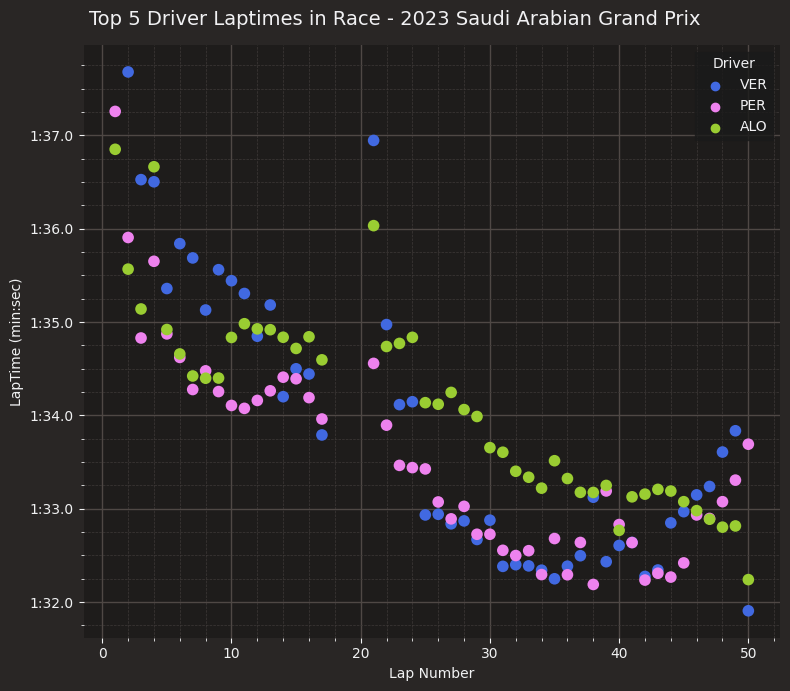

In [ ]:
# Get all the Top 3 drivers laps, filter out slow laps, colors.
point_finishers = race.drivers[:3]
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps().reset_index()
custom_colors = ["royalblue", "violet", "yellowgreen"]      # https://matplotlib.org/stable/gallery/color/named_colors.html


# Plot
fig, ax = plt.subplots(figsize=(8, 7))
plt.suptitle(f'Top 3 Driver Laptimes in {race.name} - {race.event.year} {race.event.EventName}', size=14)

sns.scatterplot(data=driver_laps, x="LapNumber", y="LapTime", ax=ax, hue="Driver",
                palette=custom_colors, s=70, linewidth=0, legend='auto')

ax.set_xlabel("Lap Number")
ax.set_ylabel("LapTime (min:sec)")
ax.invert_yaxis()

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()